# Basic of Limits and Continuity

## Limit of a Function and Limit Laws

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

In [42]:
## This is OOP style
class LimitGraph:
    def __init__(self, func, hole_x=None, x_range=(0, 10), label=None):
        self.func = func
        self.hole_x = hole_x
        self.x_range = x_range
        self.label = label if label else "f(x)"

    def plot(self):
        x = np.linspace(self.x_range[0], self.x_range[1], 400)
        if self.hole_x is not None:
            x = x[x != self.hole_x]

        y = self.func(x)

        plt.plot(x, y, label=self.label, color='dodgerblue')
        
        if self.hole_x is not None:
            y_hole = self.func(self.hole_x)
            plt.scatter(self.hole_x, y_hole, color='white', edgecolors='black',
                        zorder=5, s=100, label=f'hole at x = {self.hole_x}')

        plt.axvline(self.hole_x, color='gray', linestyle='--', alpha=0.5)
        plt.axhline(self.func(self.hole_x), color='gray', linestyle='--', alpha=0.5)
        plt.title(f"Graph of {self.label}")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

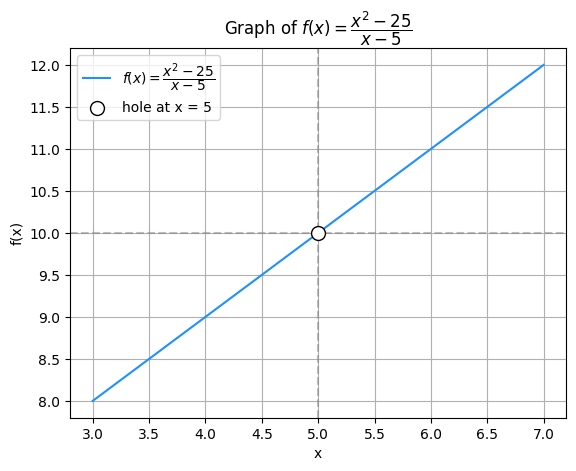

In [43]:
def fx(x):
    return x + 5
g = LimitGraph(func=fx, hole_x=5, x_range=(3, 7),label=r"$f(x) = \dfrac{x^2 - 25}{x - 5}$")
g.plot()

Although the function is not defined at $x = 5$, we can still find the limit as $x$ approaches $5$.
when we simplify the expression, we get $f(x)=x+5$ for all $x != 5$
So as $x$ gets closer and closer to 5 from both sides, $f(x)$ gets closer to 10. 
$$\lim_{x \to 5}\frac{x^2-25}{x-5} = 10$$


In [44]:
data = {
    "x (→ 5⁻)": [4.9, 4.99, 4.999, 4.9999],
    "f(x) (Left)": [9.9, 9.99, 9.999, 9.9999],
    "x (→ 5⁺)": [5.1, 5.01, 5.001, 5.0001],
    "f(x) (Right)": [10.1, 10.01, 10.001, 10.0001]
}

df = pd.DataFrame(data)
df

,x (→ 5⁻),f(x) (Left),x (→ 5⁺),f(x) (Right)
0,4.9000,9.9000,5.1000,10.1000
1,4.9900,9.9900,5.0100,10.0100
2,4.9990,9.9990,5.0010,10.0010
3,4.9999,9.9999,5.0001,10.0001


### Limit Laws
1. **Limit of a Constant:**  
   $\lim_{x \to c} k = k$

2. **Limit of a Linear Function:**  
   $\lim_{x \to c} x = c$

3. **Scalar Multiple Law:**  
   $\lim_{x \to c} [k \cdot f(x)] = k \cdot \lim_{x \to c} f(x)$

4. **Sum Law:**  
   $\lim_{x \to c} [f(x) + g(x)] = \lim_{x \to c} f(x) + \lim_{x \to c} g(x)$

5. **Difference Law:**  
   $\lim_{x \to c} [f(x) - g(x)] = \lim_{x \to c} f(x) - \lim_{x \to c} g(x)$

6. **Product Law:**  
   $\lim_{x \to c} [f(x) \cdot g(x)] = \lim_{x \to c} f(x) \cdot \lim_{x \to c} g(x)$

7. **Quotient Law:**  
   $\lim_{x \to c} \frac{f(x)}{g(x)} = \frac{\lim_{x \to c} f(x)}{\lim_{x \to c} g(x)}$,  
   where $\lim_{x \to c} g(x) \ne 0$


Polynomial Equation
The polynomial equation is $f(x) = 6x^2+4x^2+9$

**Example**

$
\
\begin{aligned}
\lim_{x \to c} \left(6x^3 + 4x^2 + 9\right) 
&= \lim_{x \to c} 6x^3 + \lim_{x \to c} 4x^2 + \lim_{x \to c} 9 \\
&= 6\cdot \lim_{x \to c}x^3 + 4 \cdot \lim_{x \to c} x^2 + \lim_{x \to c} 9 \\
&= 6c^3 + 4c^2 + 9 \\
\end{aligned}
\
$

*Another version*


$
\
\begin{aligned}
\lim_{x \to 5} \left(6x^3 + 4x^2 + 9\right) 
&= \lim_{x \to 5} 6x^3 + \lim_{x \to 5} 4x^2 + \lim_{x \to 5} 9 \\
&= 6\cdot \lim_{x \to 5}x^3 + 4 \cdot \lim_{x \to 5} x^2 + \lim_{x \to 5} 9 \\
&= 6(5)^3 + 4(5)^2 + 9 \\
&= 750 + 100 + 9 \\
&= 859
\end{aligned}
\
$

In [45]:
# Using SymPy
from sympy import symbols, limit

x = symbols('x')
expr = 6*x**3 + 4*x**2 + 9
result = limit(expr, x, 5)
print(f"The result of from SymPy version {result}\n")

# From Scratch
def fx(x):
    return 6*x**3 + 4*x**2 + 9

x = 5
y = fx(x)
print(f"The result of from scratch version {y}\n")

The result of from SymPy version 859

The result of from scratch version 859



### Limit of Polynomials
Let $a_i, n, x \in \mathbb{R}$ and define the polynomial function:
$$P(x) = a_{n}x^n + a_{n-1}x^{n-1} + \dots +a_1x+ a_0$$, then:
$$
\lim_{x \to c}P(x) = P(c) = a_{n}c^n + a_{n-1}c^{n-1} + \dots +a_1x + a_{0}
$$

### Limit of Rational Function
If $P(x)$ and $Q(x)$ are polynomials and $Q(c) \neq 0 $, then :
$$
\lim_{x \to c}\frac{P(x)}{Q(x)} = \frac{P(c)}{Q(c)}
$$

### Squeeze Theorem (a.k.a. Sandwich Theorem)

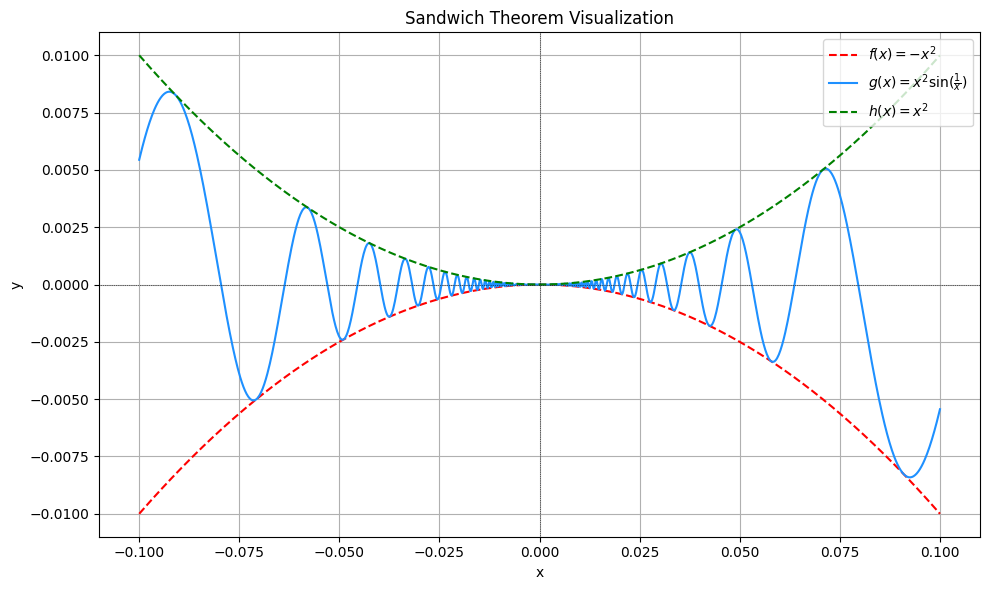

In [46]:
x = np.linspace(-0.1, 0.1, 1000)
x = x[x != 0]

# Define the functions
f = -x**2
g = x**2 * np.sin(1/x)
h = x**2

plt.figure(figsize=(10, 6))
plt.plot(x, f, label=r'$f(x) = -x^2$', color='red', linestyle='--')
plt.plot(x, g, label=r'$g(x) = x^2 \sin(\frac{1}{x})$', color='dodgerblue')
plt.plot(x, h, label=r'$h(x) = x^2$', color='green', linestyle='--')

plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')

plt.title("Sandwich Theorem Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

If we have functions \( f(x), g(x), h(x) \) and there's a range of \( x \) around \( c \) such that:

$$
f(x) \leq g(x) \leq h(x)
$$

and:

$$
\lim_{x \to c} f(x) = \lim_{x \to c} h(x) = L
$$

Then we can conclude:

$$
\lim_{x \to c} g(x) = L
$$

This theorem is useful when a function is hard to evaluate directly, but it's squeezed between two others whose limits are easy to find.

If you're into deeper math, you can find formal proofs of this theorem in **Real Analysis** or **Functional Analysis** texts.


*Example of Sandwich theorem use case*

Proof that 
$$\lim_{x \to 0}\frac{sin(x)}{x} = 1$$

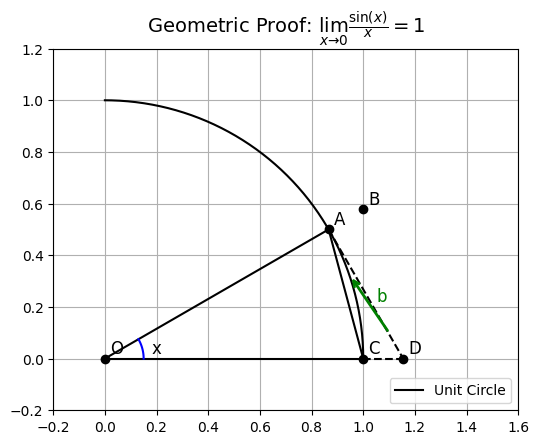

In [47]:
def point_on_circle(angle):
    return np.cos(angle), np.sin(angle)

x_angle = np.pi / 6

O = (0, 0)
A = point_on_circle(x_angle)
C = (1, 0)
B = (1, np.tan(x_angle))
D = (1 / np.cos(x_angle), 0)


fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

theta = np.linspace(0, np.pi/2, 300)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, 'k', label='Unit Circle')

# ax.fill([O[0], C[0], A[0]], [O[1], C[1], A[1]], color='skyblue', label='Triangle OAC')
# ax.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='purple', alpha=0.6, label='Sector/Thin Slice')
# ax.fill([A[0], C[0], D[0]], [A[1], C[1], D[1]], color='lightgreen', alpha=0.6, label='Triangle ACD')


ax.plot([O[0], C[0]], [O[1], C[1]], 'k-')
ax.plot([O[0], A[0]], [O[1], A[1]], 'k-')
ax.plot([A[0], C[0]], [A[1], C[1]], 'k-')
ax.plot([A[0], D[0]], [A[1], D[1]], 'k--')
ax.plot([C[0], D[0]], [C[1], D[1]], 'k--')


arc = np.linspace(0, x_angle, 100)
ax.plot(0.15 * np.cos(arc), 0.15 * np.sin(arc), 'blue')
ax.text(0.18, 0.02, 'x', fontsize=12)
ax.annotate('', xy=(0.95, 0.32), xytext=(1.1, 0.1),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.text(1.05, 0.22, 'b', color='green', fontsize=12)
points = {'O': O, 'A': A, 'B': B, 'C': C, 'D': D}
for label, (x, y) in points.items():
    ax.plot(x, y, 'ko')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12)

ax.set_xlim(-0.2, 1.6)
ax.set_ylim(-0.2, 1.2)
plt.grid(True)
plt.title(r"Geometric Proof: $\lim_{x \to 0} \frac{\sin(x)}{x} = 1$", fontsize=14)
plt.legend(loc='lower right')
plt.show()

#### Proof: $\lim_{x \to 0} \frac{\sin(x)}{x} = 1$

##### Instruction
Use geometry or inequalities.  
For $x \in (0, \frac{\pi}{2})$, we have the following inequality:

$$
\cos(x) \leq \frac{\sin(x)}{x} \leq 1
$$

##### Geometric Idea

Consider a unit circle (radius = 1), and angle $x$ (in radians), with $x \in (0, \frac{\pi}{2})$. We can compare the following **three areas**:

1. **Area of triangle $OAC$** (formed by radius and vertical):
   $$
   \text{Area}_{\triangle OAC} = \frac{1}{2} \sin(x)
   $$

2. **Area of sector $OAC$** (circular slice):
   $$
   \text{Area}_{\text{sector}} = \frac{1}{2} x
   $$

3. **Area of triangle $OAD$** (formed by tangent line):
   $$
   \text{Area}_{\triangle OAD} = \frac{1}{2} \tan(x)
   $$

So we get the inequality from comparing areas:

$$
\sin(x) < x < \tan(x)
$$

##### Derive the Squeeze

Divide all sides by $\sin(x)$ (positive for $x \in (0, \frac{\pi}{2})$):

$$
1 < \frac{x}{\sin(x)} < \frac{1}{\cos(x)}
$$

Take reciprocals (reverse inequalities):

$$
\cos(x) < \frac{\sin(x)}{x} < 1
$$

##### Apply the Squeeze Theorem

As $x \to 0^+$:

- $\lim_{x \to 0^+} \cos(x) = 1$
- $\lim_{x \to 0^+} 1 = 1$

So by the **Sandwich Theorem**:

$$
\lim_{x \to 0^+} \frac{\sin(x)}{x} = 1
$$

Since $\frac{\sin(x)}{x}$ is an **even function** (i.e., symmetric around $x=0$), the same holds for the left-hand limit:

$$
\lim_{x \to 0^-} \frac{\sin(x)}{x} = 1
$$

##### Final Result

$$
{\lim_{x \to 0} \frac{\sin(x)}{x} = 1}
$$


In [48]:
# It have same result if we using SymPy
x = sympy.Symbol('x')
expr = sympy.sin(x) / x
limit_result = sympy.limit(expr, x, 0)
print(limit_result)

1


## Formal Definition of a Limit

In mathematics — especially in **Analysis** — precision is essential. To fully and rigorously define the concept of a limit, we must go beyond intuition and introduce a formal logical framework. This leads us to the **Delta-Epsilon** definition of a limit.

### The Delta-Epsilon Definition

Let $f(x)$ be defined on an open interval about $c$, except possibly at $c$ itself. We say that the limit of $f(x)$ as $x$ approaches $c$ is the number $L$, and write

$$
\lim_{x \to c} f(x) = L
$$

if, for every number $\epsilon > 0$, there exists a corresponding number $\delta > 0$ such that

$|f(x) - L| < \epsilon \quad \text{whenever} \quad 0 < |x - c| < \delta$.

---

The **Delta-Epsilon** definition is a more precise way to define limits, moving past the informal ideas of "getting closer and closer" to a value. This formal framework is essential for proving theorems in advanced mathematics.

*example*
$$\lim_{x \to 3}(2x-1) = 5$$

#### 1. Function Definition

In [49]:
def f(x):
    return 2*x - 1

#### 2. Key Parameters

In [50]:
x0 = 3          # Point of interest
L = f(x0)       # Limit value = 5
epsilon = 1.5   # Tolerance around L
delta = epsilon / 2  # Tolerance around x0 = 0.75

#### 3. Colored Regions

##### Red Shaded Area (ε-band)
- **Horizontal band** between y = L - ε and y = L + ε
- Range: y ∈ [3.5, 6.5]
- Represents acceptable values of f(x) within ε tolerance

##### Green Shaded Area (δ-band)  
- **Vertical band** between x = x₀ - δ and x = x₀ + δ
- Range: x ∈ [2.25, 3.75]
- Represents acceptable values of x within δ tolerance

##### Yellow Shaded Area (Valid Region)
- **Intersection** of red and green bands
- Shows the region where both conditions are satisfied
- Proves that when x is within δ of x₀, f(x) is within ε of L

#### 4. Key Visual Elements

##### Points
- **Black dot (3, 5)**: The limit point (x₀, L)
- **Red dot (0, 0)**: Origin for reference

##### Lines
- **Blue solid line**: The function f(x) = 2x - 1
- **Red dashed lines**: ε boundaries at y = 3.5 and y = 6.5
- **Green dashed lines**: δ boundaries at x = 2.25 and x = 3.75
- **Gray lines**: Reference axes through the limit point

##### Customization Options
- **Change ε value**: Modify `epsilon = 1.5` to see different tolerance levels
- **Adjust δ calculation**: Currently δ = ε/2, but you can use different relationships
- **Modify function**: Change `def f(x)` to visualize other functions
- **Adjust plot range**: Modify `xlim()` and `ylim()` for different viewing windows

#### Mathematical Verification
For $f(x) = 2x - 1$ with $\epsilon = 1.5$:

1. **Given**: $|x - 3| < \delta = 0.75$
2. **Then**: 
   $
   |f(x) - 5| = |(2x - 1) - 5| = |2x - 6| = 2|x - 3|
   $
3. **Since** $|x - 3| < 0.75$, we have:
   $
   2|x - 3| < 2(0.75) = 1.5 = \epsilon
   $
4. **Therefore**: $|f(x) - 5| < \epsilon$ ✓

This confirms that for every $\epsilon > 0$, we can find $\delta = \frac{\epsilon}{2}$ such that  
if $0 < |x - 3| < \delta$, then $|f(x) - 5| < \epsilon$.

**Thus, by the Delta-Epsilon definition of a limit**:
$
\lim_{x \to 3} (2x - 1) = 5 \quad \blacksquare
$



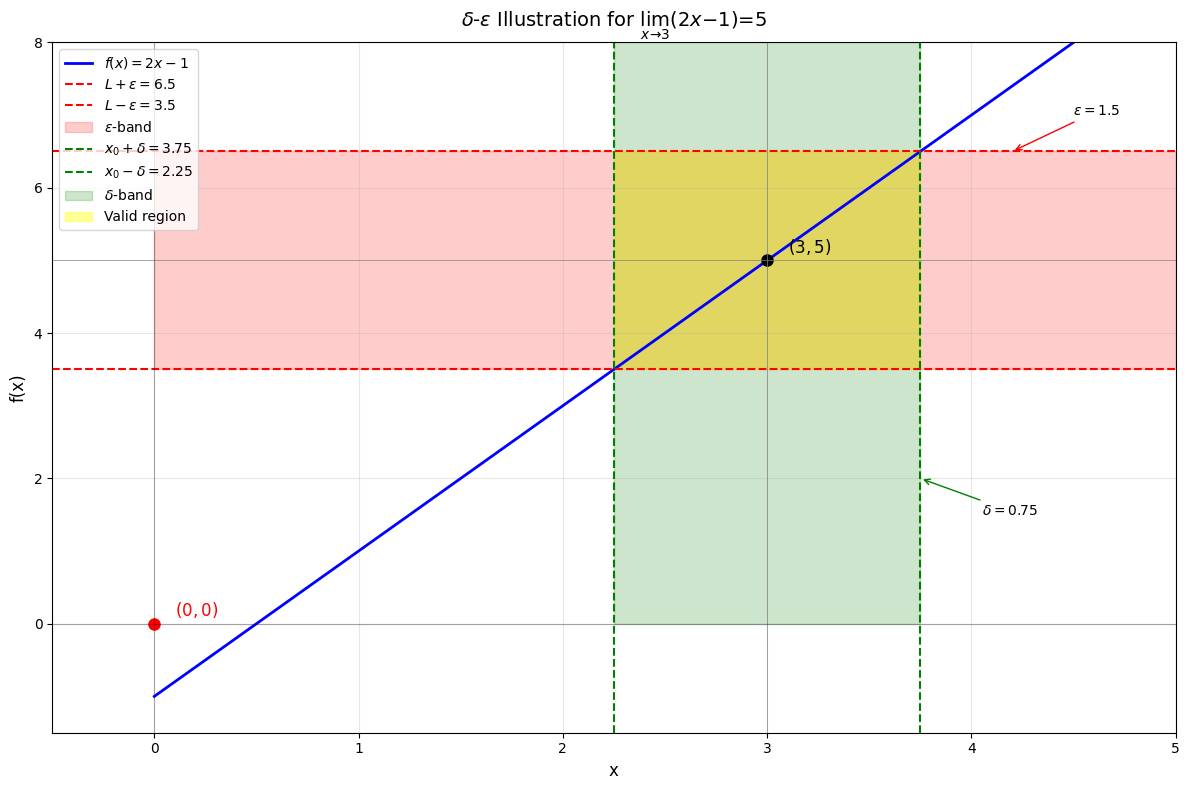

In [51]:
# Range of x
x = np.linspace(0, 5, 400)
y = f(x)

# Plot setup
plt.figure(figsize=(12, 8))
plt.plot(x, y, label=r'$f(x) = 2x - 1$', color='blue', linewidth=2)

# Horizontal ε-band
plt.axhline(L + epsilon, color='red', linestyle='--', label=fr'$L + \epsilon = {L + epsilon}$')
plt.axhline(L - epsilon, color='red', linestyle='--', label=fr'$L - \epsilon = {L - epsilon}$')
plt.fill_between(x, L - epsilon, L + epsilon, color='red', alpha=0.2, label=r'$\epsilon$-band')

# Vertical δ-band
y_fill = np.linspace(0, 8, 100)
plt.axvline(x0 + delta, color='green', linestyle='--', label=fr'$x_0 + \delta = {x0 + delta}$')
plt.axvline(x0 - delta, color='green', linestyle='--', label=fr'$x_0 - \delta = {x0 - delta}$')
plt.fill_betweenx(y_fill, x0 - delta, x0 + delta, color='green', alpha=0.2, label=r'$\delta$-band')

# Intersection (valid region)
x_inter = np.linspace(x0 - delta, x0 + delta, 100)
plt.fill_between(x_inter, L - epsilon, L + epsilon, color='yellow', alpha=0.4, label='Valid region')

# Key points
plt.plot(x0, L, 'ko', markersize=8)
plt.text(x0 + 0.1, L + 0.1, r'$(3, 5)$', fontsize=12)

plt.plot(0, 0, 'ro', markersize=8)
plt.text(0.1, 0.1, r'$(0, 0)$', fontsize=12, color='red')

# Axes and grid
plt.axhline(L, color='gray', linewidth=0.5)
plt.axvline(x0, color='gray', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.3)
plt.axvline(0, color='black', linewidth=0.8, alpha=0.3)

# Annotations
plt.annotate(r'$\epsilon = 1.5$', xy=(4.2, L + epsilon), xytext=(4.5, L + epsilon + 0.5),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

plt.annotate(r'$\delta = 0.75$', xy=(x0 + delta, 2), xytext=(x0 + delta + 0.3, 1.5),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10)

# Labels and layout
plt.title(r'$\delta$-$\epsilon$ Illustration for $\lim_{x \to 3}(2x - 1) = 5$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.xlim(-0.5, 5)
plt.ylim(-1.5, 8)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## One-Side Limit and Continuity

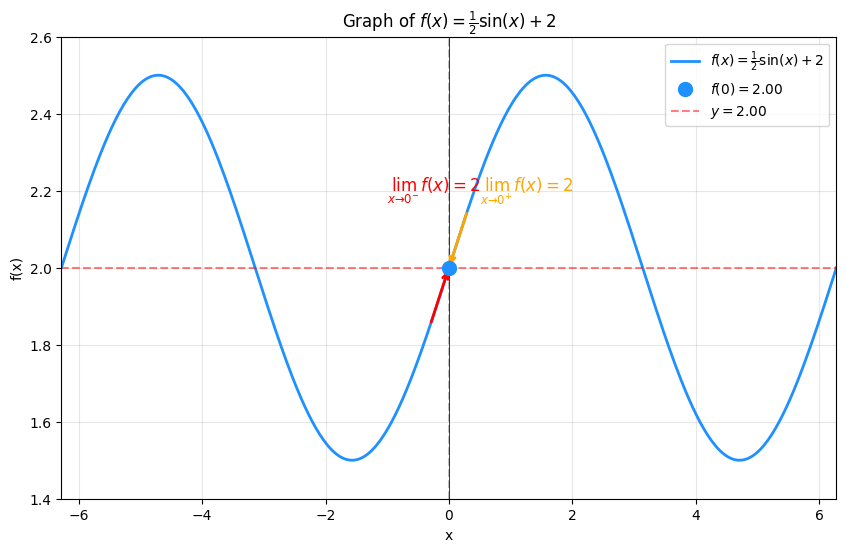

In [52]:
# Define the function
def f(x):
    return 0.5 * np.sin(x) + 2

# Generate x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = f(x)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the actual function
plt.plot(x, y, 'dodgerblue', linewidth=2, label=r'$f(x) = \frac{1}{2}\sin(x) + 2$')

# Mark the point at x=0
plt.scatter(0, f(0), color='dodgerblue', s=100, zorder=5, label=f'$f(0) = {f(0):.2f}$', edgecolors='dodgerblue')

# Add reference lines
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(f(0), color='red', linestyle='--', alpha=0.5, label=f'$y = {f(0):.2f}$')

# Add arrows and text for one-sided limits
# Left-sided limit (approaching from negative x)
plt.annotate('', xy=(0, f(0)), xytext=(-0.3, f(-0.3)),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             zorder=4)
plt.text(-1, 2.2, r'$\lim_{x \to 0^-} f(x) = 2$', color='red', fontsize=12)

# Right-sided limit (approaching from positive x)
plt.annotate('', xy=(0, f(0)), xytext=(0.3, f(0.3)),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2),
             zorder=4)
plt.text(0.5, 2.2, r'$\lim_{x \to 0^+} f(x) = 2$', color='orange', fontsize=12)


# Customize plot
plt.title(r'Graph of $f(x) = \frac{1}{2}\sin(x) + 2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Set reasonable limits to see the function clearly
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(1.4, 2.6)
plt.show()